<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import panel as pn
pn.extension('plotly')
from plotly.subplots import make_subplots
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
#Funciones

def cargarbase(ruta):
    datos=pd.read_csv(ruta, sep='¬', engine='python')
    return datos

def concatenar_interno(lista):
    resultado = pd.concat(lista, join='outer')
    return resultado

def missingdata(df):
    datosperdidos= df.isnull().sum()
    totaldatosperdidos = datosperdidos.sum()
    filas= df.shape[0]
    columnas= df.shape[1]
    porcentaje=[]
    for i in datosperdidos.index:
        porcentaje.append((datosperdidos.loc[i]/filas)*100)     
    res = dict(zip(datosperdidos.index.tolist(), porcentaje))
    resultado = pd.DataFrame(res.items(), columns=['Columna', 'Datos Perdidos %'])
    resultado=resultado.sort_values(by=['Datos Perdidos %'], ascending=False).set_index('Columna')
    print('La base tiene filas: '+ str(filas)+ ',columnas:' + str(columnas) + 
          ',Total de datos: '+ str(filas*columnas)+
          ' y datos perdidos (número y porcentaje): '+ 
          str(totaldatosperdidos)+ ',' + str(totaldatosperdidos/(filas*columnas)*100)+ '%')
          
    return resultado

def imputacion(df):
    for i in df:
        #Se asume que para la columna ESTU_TIENEETNIA los espacios en blanco corresponden a personas que no
        #hacen parte de un grupo etnico
        if i== 'ESTU_TIENEETNIA':
            valor='No'
            df[i].fillna(valor,inplace=True)
        elif df[i].dtype == object:
            df[i].fillna(df[i].mode()[0], inplace=True)
        else:
            df[i].fillna(df[i].median(), inplace =True)
    return df

def tipodedata(df,parametro):
    categorica=[]
    continuo=[]
    for i in df:    
        if df[i].dtype == object:
            categorica.append(i)
        else:
            continuo.append(i)
    if parametro == 1:
        df= df[categorica]
    else:
        df= df[continuo]
    return df

def generar_dummies(df,nombre_columna):
    columna=pd.get_dummies(df[nombre_columna])
    df= pd.concat([df,columna],axis=1)

def grafico_barras(df,agruparpor,columnacontar,titulox, titulografico,filtrado):
    df= df[[agruparpor,columnacontar]]
    titulo = 'Cantidad de personas por:' + str(titulografico)
    if filtrado == 'No':
        df.groupby(by=agruparpor).count().plot(kind='bar', xlabel=titulox, ylabel='Frecuencia', title=titulo)
    else:
        df.groupby(by=agruparpor).count().sort_values(by=columnacontar,ascending=False).head(10).plot(kind='bar', xlabel=titulox, ylabel='Frecuencia', title=titulo)
    plt.show()
    
def grafico_violin(df,datos_x,datos_y):
    df= df[[datos_x,datos_y]]
    grafico_violin = sns.violinplot(x=datos_x, y=datos_y,data=df,inner="quartile")
    
    plt.show()


##### 1.1 Obtener los datos y crear una base unificada

In [3]:
#Cargamos las bases de datos
base_20211= cargarbase('Archivos\SB11_20211.txt')
base_20202= cargarbase('Archivos\SB11_20202.txt')
base_20201= cargarbase('Archivos\SB11_20201.txt')
#base_20192= cargarbase('Archivos\SB11_20192.txt')
#base_20191= cargarbase('Archivos\SB11_20191.txt')

archivos_concatenar=[base_20211,base_20202,base_20201]
unirbase= concatenar_interno(archivos_concatenar)
unirbase.head()


#unirbase.to_csv(r'C:\Users\nicol\OneDrive\Documents\Universidad de los Andes\Herramientas\base.csv')

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                 TI          COLOMBIA           M           05/11/2003   
1                 TI          COLOMBIA           F           06/10/2004   
2                 TI          COLOMBIA           F           01/10/2003   
3                 TI          COLOMBIA           F           13/01/2003   
4                 TI          COLOMBIA           F           29/08/2004   

   PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE ESTU_TIENEETNIA  \
0    20211  SB11202110042506      ESTUDIANTE         COLOMBIA              No   
1    20211  SB11202110041799      ESTUDIANTE         COLOMBIA              No   
2    20211  SB11202110043835      ESTUDIANTE         COLOMBIA              No   
3    20211  SB11202110043668      ESTUDIANTE         COLOMBIA              No   
4    20211  SB11202110043350      ESTUDIANTE         COLOMBIA              No   

  ESTU_DEPTO_RESIDE  ...  PERCENTIL_INGLES DESEMP_INGLES  PUNT_GLOBAL  \
0             VALLE  ...              35.0            A2          303   
1             VALLE  ...              45.0            B1          325   
2             VALLE  ...              46.0            B1          374   
3             VALLE  ...              33.0            A2          282   
4             VALLE  ...              33.0            A2          288   

  PERCENTIL_ESPECIAL_GLOBAL PERCENTIL_GLOBAL ESTU_ESTADOINVESTIGACION  \
0                       NaN             46.0                 PUBLICAR   
1                       NaN             62.0                 PUBLICAR   
2                       NaN             92.0                 PUBLICAR   
3                       NaN             34.0                 PUBLICAR   
4                       NaN             38.0                 PUBLICAR   

  ESTU_INSE_INDIVIDUAL ESTU_NSE_INDIVIDUAL ESTU_NSE_ESTABLECIMIENTO  \
0                  NaN                 NaN                      NaN   
1                  NaN                 NaN                      NaN   
2                  NaN                 NaN                      NaN   
3                  NaN                 NaN                      NaN   
4                  NaN                 NaN                      NaN   

  ESTU_GENERACION-E  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 82 columns]

##### 1.2 Revisamos los periodos de estudio, el tamano inicial de la base, cantidad de columnas, sus nombres y tipos de datos

In [4]:
columnas=unirbase.columns
periodos=unirbase['PERIODO'].unique().tolist()
print("Los periodos de estudio son: " + str(periodos))
unirbase.info()

Los periodos de estudio son: [20211, 20204, 20201]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 535835 entries, 0 to 15434
Data columns (total 82 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             535835 non-null  object 
 1   ESTU_NACIONALIDAD              535835 non-null  object 
 2   ESTU_GENERO                    535821 non-null  object 
 3   ESTU_FECHANACIMIENTO           535835 non-null  object 
 4   PERIODO                        535835 non-null  int64  
 5   ESTU_CONSECUTIVO               535835 non-null  object 
 6   ESTU_ESTUDIANTE                535835 non-null  object 
 7   ESTU_PAIS_RESIDE               535835 non-null  object 
 8   ESTU_TIENEETNIA                530387 non-null  object 
 9   ESTU_DEPTO_RESIDE              535061 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          535061 non-null  float64
 11  ESTU_MCPIO_RESIDE              535061 non

Revisamos los datos faltantes, el porcentaje que representan sobre la base total e inspeccionamos
el porcentaje de datos faltantes de cada columna de la base inicial

In [5]:
datosperdidos= missingdata(unirbase)
datosperdidos.head(20)

La base tiene filas: 535835,columnas:82,Total de datos: 43938470 y datos perdidos (número y porcentaje): 1182224,2.6906353361871727%


Datos Perdidos %
Columna                                        
PERCENTIL_ESPECIAL_GLOBAL             99.971073
COLE_BILINGUE                         16.455999
ESTU_NSE_INDIVIDUAL                    5.629345
ESTU_INSE_INDIVIDUAL                   5.629345
FAMI_COMECEREALFRUTOSLEGUMBRE          4.204093
FAMI_TIENECOMPUTADOR                   4.132242
FAMI_TRABAJOLABORPADRE                 4.050874
FAMI_TIENEAUTOMOVIL                    3.697780
ESTU_TIPOREMUNERACION                  3.674825
FAMI_TRABAJOLABORMADRE                 3.660455
FAMI_TIENECONSOLAVIDEOJUEGOS           3.635074
FAMI_ESTRATOVIVIENDA                   3.595510
FAMI_TIENEHORNOMICROOGAS               3.568449
FAMI_TIENEMOTOCICLETA                  3.561917
ESTU_HORASSEMANATRABAJA                3.536910
FAMI_SITUACIONECONOMICA                3.421949
FAMI_TIENELAVADORA                     3.396381
FAMI_CUARTOSHOGAR                      3.327703
FAMI_TIENESERVICIOTV                   3.298963
FAMI_COMECARNEPESCADOHUEVO             3.273396

##### Imputacion de datos:

* Se hace una politica para imputar los datos, en caso que el porcentaje de datos faltantes de la columna sea mayor al 20%, la columna sera descartada automaticamente. Para los datos imputados, en caso de ser variables continuas se tomara la mediana, en caso de ser datos categoricos se procedera a tomar la moda. 

In [6]:
#Columnas a descartar inmediatamente por la politica de imputacion
columnas_eliminar=datosperdidos[datosperdidos['Datos Perdidos %']>20].index.tolist()
print('Las columnas a eliminar son: ' + str(columnas_eliminar))

#Eliminamos las columnas seleccionadas acorde a la politica establecida
unirbase=unirbase.drop(columns=columnas_eliminar)

Las columnas a eliminar son: ['PERCENTIL_ESPECIAL_GLOBAL']


In [7]:
#Imputamos los datos acorde a la politica establecida
baseimputada = imputacion(unirbase)

#Revisamos nuevamente que no existan dados perdidos
datosperdidos_2= missingdata(baseimputada)
datosperdidos_2.head(20)

La base tiene filas: 535835,columnas:81,Total de datos: 43402635 y datos perdidos (número y porcentaje): 0,0.0%


Datos Perdidos %
Columna                                      
ESTU_TIPODOCUMENTO                        0.0
COLE_NATURALEZA                           0.0
PUNT_LECTURA_CRITICA                      0.0
ESTU_COD_DEPTO_PRESENTACION               0.0
ESTU_DEPTO_PRESENTACION                   0.0
ESTU_MCPIO_PRESENTACION                   0.0
ESTU_COD_MCPIO_PRESENTACION               0.0
ESTU_PRIVADO_LIBERTAD                     0.0
COLE_DEPTO_UBICACION                      0.0
COLE_COD_DEPTO_UBICACION                  0.0
COLE_MCPIO_UBICACION                      0.0
COLE_COD_MCPIO_UBICACION                  0.0
COLE_JORNADA                              0.0
COLE_AREA_UBICACION                       0.0
COLE_SEDE_PRINCIPAL                       0.0
COLE_NOMBRE_SEDE                          0.0
COLE_COD_DANE_SEDE                        0.0
COLE_CARACTER                             0.0
COLE_BILINGUE                             0.0
PERCENTIL_LECTURA_CRITICA                 0.0

##### 1.3 Seleccionamos las columnas de intereres motivos del estudio. Para esto se reviso el significado de las columnas en el diccionario saber 11, publicado en  https://www.icfes.gov.co/documents/20143/1885630/6.+Diccionario+Saber11+2019-1+a+2019-2.pdf , tomado el 20 de noviembre del 2021.

En este diccionario se va a encontrar las caracteristicas sociodemograficas, economicas y puntajes que recoge la base de datos para cada uno de los participantes en la prueba saber pro 11.

A continuacion un breve resumen del tipo de datos que se encuentran en las bases:

1. Informacion Personal

2. Informacion de Contacto

3. Informacion socieconomica

4. Informacion del colegio

5. Datos de citacion del examen

6. Resultados

##### 1.4 Con base a esta informacion se seleccionaron las siguientes variables sociodemograficas-economicas y sus respectivos puntajes:

* ESTU_NACIONALIDAD:Nacionalidad 

* ESTU_GENERO: Género

* COLE_BILINGUE: Es bilingue si o no

* ESTU_TIENEETNIA: ¿Pertenece usted a un grupo étnico minoritario?

* ESTU_CONSECUTIVO:Id público del inscrito (SB11) 

* ESTU_DEPTO_RESIDE: Departamento de residencia

* FAMI_ESTRATOVIVIENDA:Estrato socioeconómico de la vivienda según recibo de energía eléctrica

* FAMI_PERSONASHOGAR:¿Cuántas personas conforman el hogar donde vive actualmente, incluido usted?

* FAMI_EDUCACIONPADRE:Nivel educativo más alto alcanzado por el padre

* FAMI_EDUCACIONMADRE:Nivel educativo más alto alcanzado por el madre

* FAMI_TIENEINTERNET:¿Su hogar cuenta con servicio o conexión a internet?

* FAMI_TIENECOMPUTADOR:¿Cuáles de los siguientes bienes posee su hogar?: Computador

* FAMI_NUMLIBROS:¿Cuántos libros físicos o electrónicos hay en su hogar excluyendo periódicos, revistas, directorios telefónicos y librosdel colegio?

* ESTU_DEDICACIONLECTURADIARIA: Usualmente, ¿cuánto tiempo al día dedica a leer por entretenimiento?

* ESTU_DEDICACIONINTERNET: Usualmente, ¿cuánto tiempo al día dedica a navegar en internet? Excluya actividades académicas

* PUNT_LECTURA_CRITICA: Puntaje en lectura crítica 

* PUNT_MATEMATICAS:Puntaje en matemáticas

* PUNT_C_NATURALES: Puntaje en ciencias naturales

* PUNT_SOCIALES_CIUDADANAS: Puntaje sociales y ciudadanas

* PUNT_INGLES:Puntaje inglés. El valor de -1 indica que el estudiante no contestó ninguna pregunta

* PUNT_GLOBAL: Puntaje total obtenido 

In [8]:
columnas_interes=['ESTU_NACIONALIDAD','COLE_BILINGUE','ESTU_GENERO','ESTU_TIENEETNIA','ESTU_CONSECUTIVO','ESTU_DEPTO_RESIDE',
                 'FAMI_ESTRATOVIVIENDA','FAMI_PERSONASHOGAR','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TIENEINTERNET',
                  'FAMI_TIENECOMPUTADOR','FAMI_NUMLIBROS','ESTU_DEDICACIONLECTURADIARIA','ESTU_DEDICACIONINTERNET',
                 'PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS',
                 'PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS',
                 'PUNT_INGLES',
                 'PUNT_GLOBAL']

print('Las columnas de interes son: '+ str(columnas_interes))


#Filtramos la base para quedarnos unicamente con las columnas de interes
base_final= baseimputada[columnas_interes]
base_final.head()

Las columnas de interes son: ['ESTU_NACIONALIDAD', 'COLE_BILINGUE', 'ESTU_GENERO', 'ESTU_TIENEETNIA', 'ESTU_CONSECUTIVO', 'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_NUMLIBROS', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']


ESTU_NACIONALIDAD COLE_BILINGUE ESTU_GENERO ESTU_TIENEETNIA  \
0          COLOMBIA             N           M              No   
1          COLOMBIA             N           F              No   
2          COLOMBIA             N           F              No   
3          COLOMBIA             N           F              No   
4          COLOMBIA             N           F              No   

   ESTU_CONSECUTIVO ESTU_DEPTO_RESIDE FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR  \
0  SB11202110042506             VALLE            Estrato 5              1 a 2   
1  SB11202110041799             VALLE            Estrato 3              3 a 4   
2  SB11202110043835             VALLE            Estrato 3              3 a 4   
3  SB11202110043668             VALLE            Estrato 4              5 a 6   
4  SB11202110043350             VALLE            Estrato 5              5 a 6   

                FAMI_EDUCACIONPADRE                 FAMI_EDUCACIONMADRE  ...  \
0                           No sabe  Secundaria (Bachillerato) completa  ...   
1  Educación profesional incompleta  Secundaria (Bachillerato) completa  ...   
2    Educación profesional completa      Educación profesional completa  ...   
3    Educación profesional completa      Educación profesional completa  ...   
4                 Primaria completa  Secundaria (Bachillerato) completa  ...   

  FAMI_TIENECOMPUTADOR   FAMI_NUMLIBROS ESTU_DEDICACIONLECTURADIARIA  \
0                   No    0 A 10 LIBROS   No leo por entretenimiento   
1                   Si   11 A 25 LIBROS   No leo por entretenimiento   
2                   Si    0 A 10 LIBROS        Entre 30 y 60 minutos   
3                   Si  26 A 100 LIBROS   No leo por entretenimiento   
4                   Si   11 A 25 LIBROS        Entre 30 y 60 minutos   

  ESTU_DEDICACIONINTERNET PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  \
0          Más de 3 horas                   63                62   
1       Entre 1 y 3 horas                   65                70   
2   Entre 30 y 60 minutos                  100                66   
3   Entre 30 y 60 minutos                   62                55   
4       Entre 1 y 3 horas                   57                67   

   PUNT_C_NATURALES  PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  PUNT_GLOBAL  
0                61                        56         61.0          303  
1                63                        61         69.0          325  
2                62                        73         69.0          374  
3                54                        53         60.0          282  
4                53                        53         60.0          288  

[5 rows x 21 columns]

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

### Preguntas a abordar a partir de las variables seleccionadas en una primera etapa:
* Es pertinente incluir los puntajes individuales de las pruebas para pronosticas el puntaje global?
* Cuales variables socioeconomicas y demograficas son determinantes en el puntaje obtenido?
* En que medida un colegio bilingue influye en el puntaje obtenido?

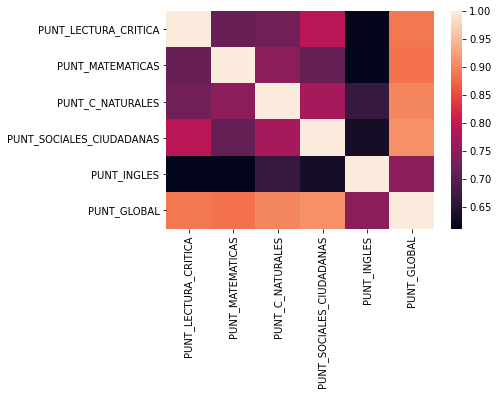

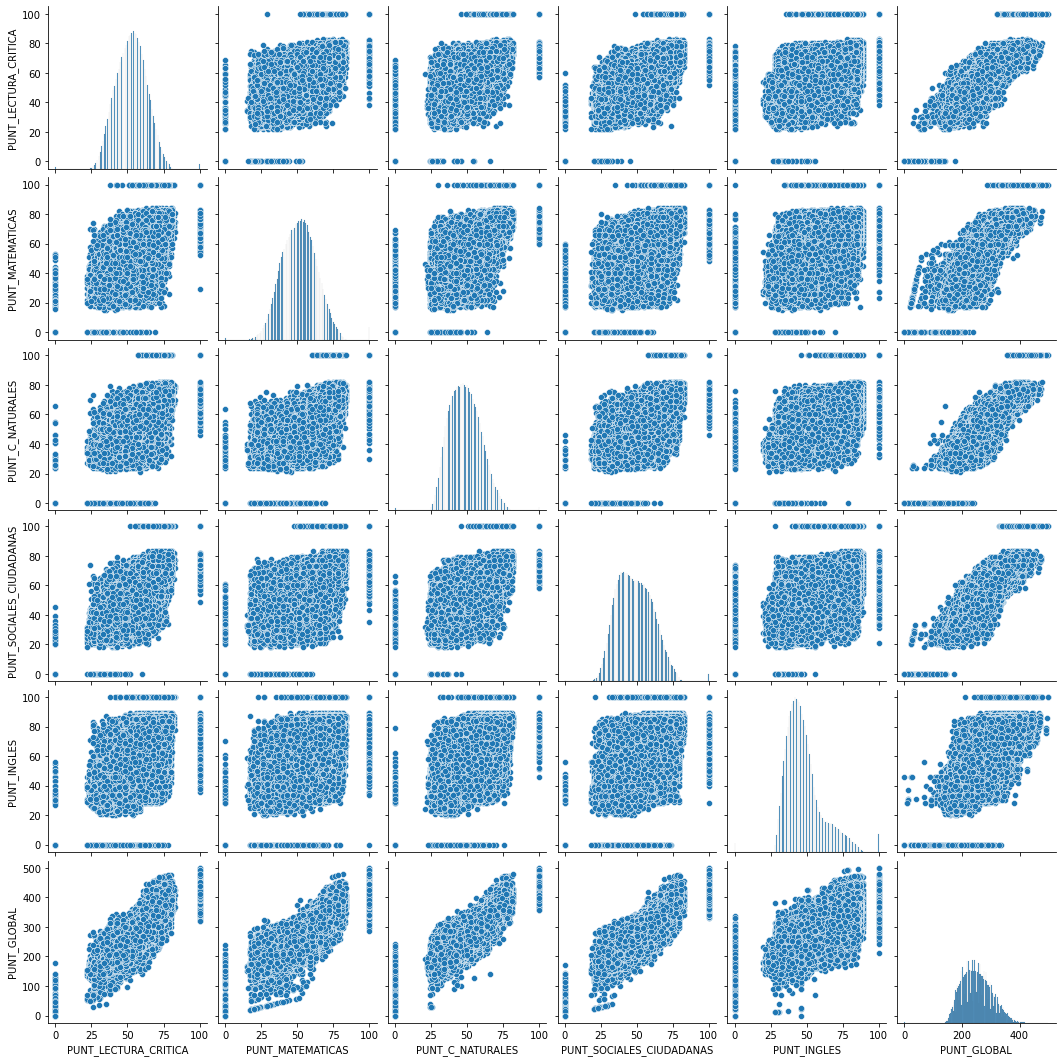

Se concluye que las variables muestran una alta correlacion entre ellas y por lo tanto no deben ser incluidas en el momento de hacer algun tipo de regresion. En si, el puntaje global es consecuencia de los puntajes individuales en cada uno de los componentes que se evaluan, por lo cual no serian variables de interes para usar como variables independientes para ejecutar un modelo de regresion frente al puntaje global


In [9]:
#Lo primero que vamos a hacer es revisar la correlacion entre las variables continuas (puntajes de cada componente). 
#Lo que se espera es que esten
#altamente correlacionadas en la medida que el puntaje global depende de sus componentes. En caso que la correlacion
#entre las variables sea alta, no se va a incluir dentro del analisis para explicar las variable dependiente. 

#Seperamos las variables numerias de las categoricas:
base_numerica=tipodedata(base_final,0)
#Miramos la correlacion entre los puntajes
correlaciones = base_numerica.corr()

sns.heatmap(correlaciones)

#Procedemos a hacer un pairplot de cada uno de los puntajes para revisar graficos de dispersion e histogramas. 

sns.pairplot(base_numerica)

plt.show()
print('Se concluye que las variables muestran una alta correlacion entre ellas \
y por lo tanto no deben ser incluidas en el momento de hacer algun tipo de regresion. En si, el puntaje global es consecuencia \
de los puntajes individuales en cada uno de los componentes que se evaluan, por lo cual no serian variables de interes para usar\
 como variables independientes para ejecutar un modelo de regresion frente al puntaje global')


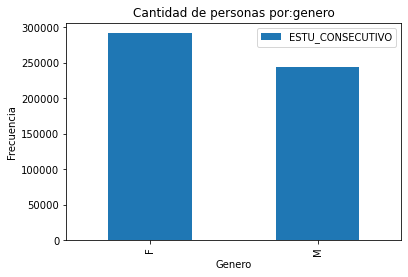

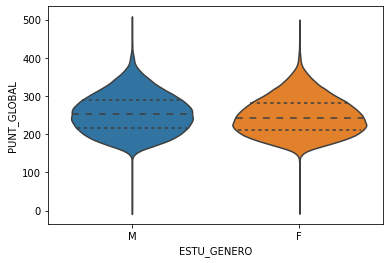

La base parece muy equilibrada en la cantidad de personas por generos, sin embargo, la dispersion frente al puntaje global       es muy similar por lo tanto se descarta esta variable para un analisis


In [10]:
#Analisis sobre variables categoricas y puntaje global

grafico_barras(base_final,'ESTU_GENERO','ESTU_CONSECUTIVO','Genero', 'genero','No')
grafico_violin(base_final,'ESTU_GENERO','PUNT_GLOBAL')


print('La base parece muy equilibrada en la cantidad de personas por generos, sin embargo, la dispersion frente al puntaje global \
      es muy similar por lo tanto se descarta esta variable para un analisis')

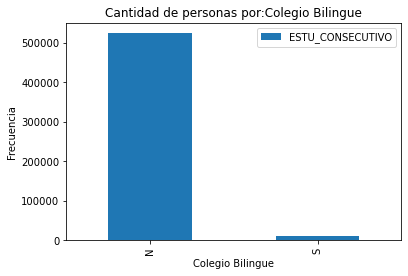

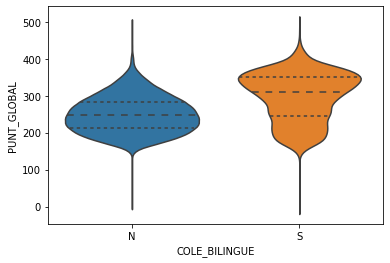

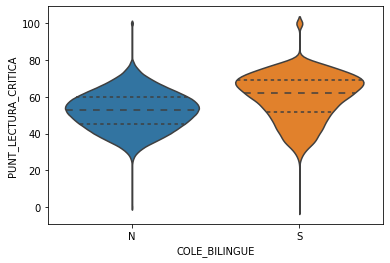

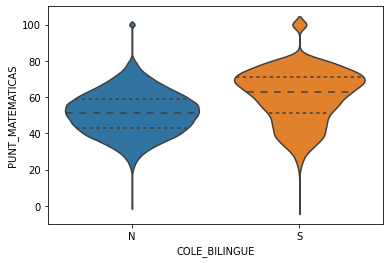

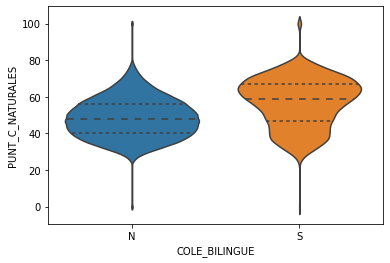

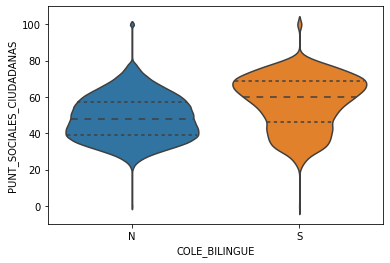

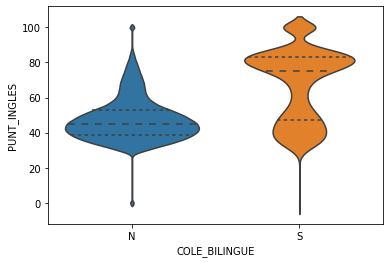

La cantidad de personas que asistieron a  un colegio bilingue es muy inferior. Adicionalmente, recibir una educacion en un colegio bilingue es determinante en el puntaje global y en cada uno de sus componentes acorde a las diferentes graficas de violin presentadas. Esto es un reto para las personas que no reciben este tipo de educacion, en la medida que van a obtener ,en su mayoria, un puntaje inferior en cada uno de los componentes.


In [11]:
#Colegio Bilingue

grafico_barras(base_final,'COLE_BILINGUE','ESTU_CONSECUTIVO','Colegio Bilingue', 'Colegio Bilingue','No')
grafico_violin(base_final,'COLE_BILINGUE','PUNT_GLOBAL')
grafico_violin(base_final,'COLE_BILINGUE','PUNT_LECTURA_CRITICA')
grafico_violin(base_final,'COLE_BILINGUE','PUNT_MATEMATICAS')
grafico_violin(base_final,'COLE_BILINGUE','PUNT_C_NATURALES')
grafico_violin(base_final,'COLE_BILINGUE','PUNT_SOCIALES_CIUDADANAS')
grafico_violin(base_final,'COLE_BILINGUE','PUNT_INGLES')


print('La cantidad de personas que asistieron a  un colegio bilingue es muy inferior. Adicionalmente, recibir una educacion en \
un colegio bilingue es determinante en el puntaje global y en cada uno de sus componentes acorde a las diferentes graficas de \
violin presentadas. Esto es un reto para las personas que no reciben este tipo de educacion, en la medida que van a obtener \
,en su mayoria, un puntaje inferior en cada uno de los componentes.')

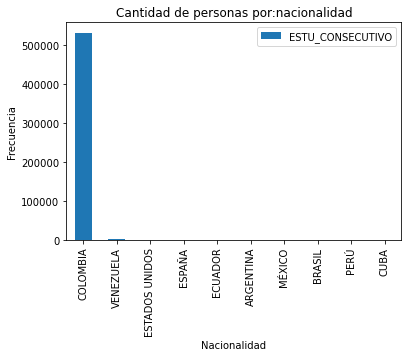

Conclusion: Acorde al grafico de barras, la variable nacionalidad no es representativa en la medida que la muestra en su mayoria solo contiene personas que tienen nacionalidad colombiana. Dado lo anterior, se descarta esta variable


In [12]:
#Cantidad de personas por nacionalidad
grafico_barras(base_final,'ESTU_NACIONALIDAD','ESTU_CONSECUTIVO','Nacionalidad', 'nacionalidad','Si')

print('Conclusion: Acorde al grafico de barras, la variable nacionalidad no es representativa en la medida que la muestra en \
su mayoria solo contiene personas que tienen nacionalidad colombiana. Dado lo anterior, se descarta esta variable')

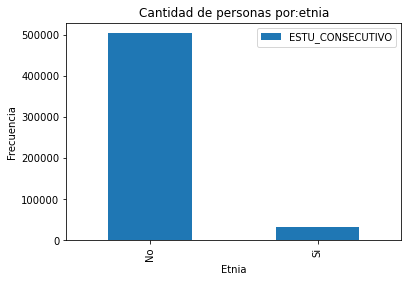

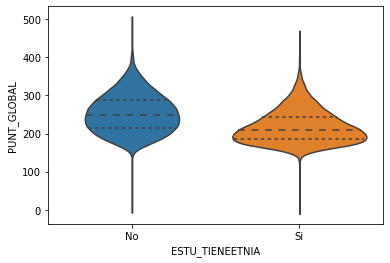

Conclusion: Si bien pertenecer a un grupo etnico tiene una representacion baja en la data, el diagrama de violin muestra como cada segmento de la poblacion difiere en resultado acorde a este parametro, por lo cual se va a incluir dentro del siguiente analisis.Al parecer los que pertecen a un grupo etnico tienen peores resultados que los otros.


In [13]:
#Cantidad de personas por etnia
grafico_barras(base_final,'ESTU_TIENEETNIA','ESTU_CONSECUTIVO','Etnia', 'etnia','No')
grafico_violin(base_final,'ESTU_TIENEETNIA','PUNT_GLOBAL')

print('Conclusion: Si bien pertenecer a un grupo etnico tiene una representacion baja en la data, el diagrama de violin muestra\
 como cada segmento de la poblacion difiere en resultado acorde a este parametro, por lo cual se va a incluir dentro del \
siguiente analisis.Al parecer los que pertecen a un grupo etnico tienen peores resultados que los otros.')

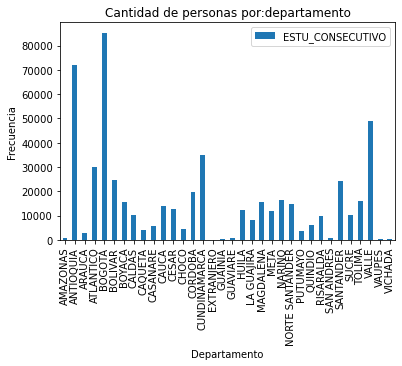

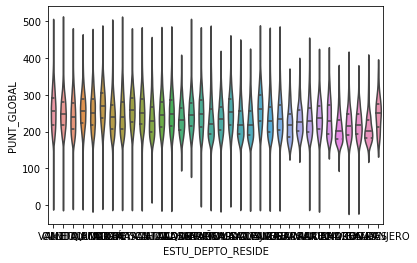

Conclusion: Los departamentos principales tienen una mayor representacion en la muestra, y al revisar los graficos de violin se puede concluir que no parecen ser un determinante en el puntaje global. Por lo tanto no se va a incluir la variable


In [14]:
#Cantidad de personas por departamento
grafico_barras(base_final,'ESTU_DEPTO_RESIDE','ESTU_CONSECUTIVO','Departamento', 'departamento','No')
grafico_violin(base_final,'ESTU_DEPTO_RESIDE','PUNT_GLOBAL')
print('Conclusion: Los departamentos principales tienen una mayor representacion en la muestra, y al revisar los graficos de \
violin se puede concluir que no parecen ser un determinante en el puntaje global. Por lo tanto no se va a incluir la variable')


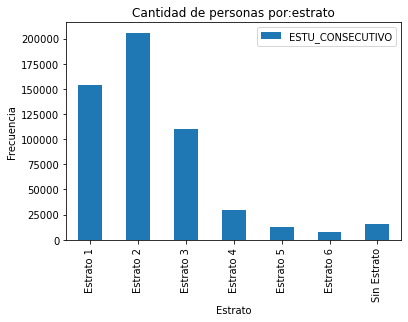

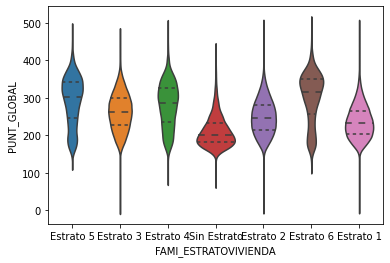

Conclusion: En cuanto a la cantidad de personas por estrato, la muestra se encuentra sesgada en la medida que hay mayor cantidad de personas que pertencen a los estratos mas bajos. Sin embargo, es pertinente notar la relacion que existe entre estratos y puntaje global (a mayor estrato, mayor probabilidad de sacar un puntaje global mas alto acorde a las funciones de densidad


In [15]:
#Cantidad de personas por estrato
grafico_barras(base_final,'FAMI_ESTRATOVIVIENDA','ESTU_CONSECUTIVO','Estrato', 'estrato','No')
grafico_violin(base_final,'FAMI_ESTRATOVIVIENDA','PUNT_GLOBAL')
print('Conclusion: En cuanto a la cantidad de personas por estrato, la muestra se encuentra sesgada en la medida que hay mayor cantidad \
de personas que pertencen a los estratos mas bajos. Sin embargo, es pertinente notar la relacion que existe entre \
estratos y puntaje global (a mayor estrato, mayor probabilidad de sacar un puntaje global mas alto acorde a las funciones de \
densidad')

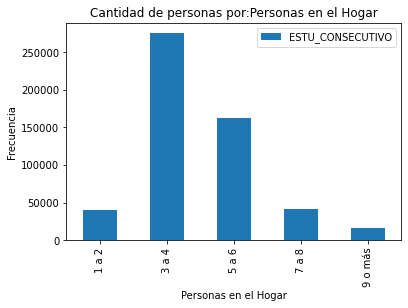

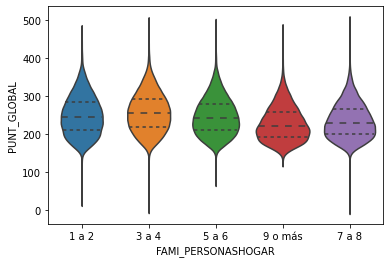

Conclusion: Hay mayor cantidad de hogares con 3 a 4 personas, sin embargo, en cuanto al desempeno en el puntaje global no parece haber un patron que sea diferente en los resultados. Teniendo en cuenta lo anterior, esta variable no se encuentra en el analisis


In [16]:
#Cantidad de personas en el hogar
grafico_barras(base_final,'FAMI_PERSONASHOGAR','ESTU_CONSECUTIVO','Personas en el Hogar', 'Personas en el Hogar','No')
grafico_violin(base_final,'FAMI_PERSONASHOGAR','PUNT_GLOBAL')
print('Conclusion: Hay mayor cantidad de hogares con 3 a 4 personas, sin embargo, en cuanto al desempeno en el puntaje global no \
parece haber un patron que sea diferente en los resultados. Teniendo en cuenta lo anterior, esta variable no se encuentra en el \
analisis')



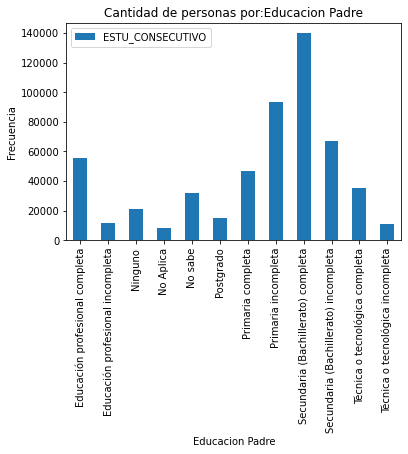

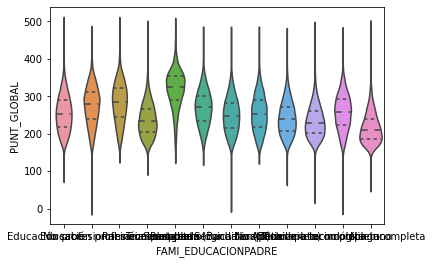

Conclusion: Hay mayor cantidad de personas con una educacion basica (primaria o bachillerato) en el caso de los padres, esto parece influcenciar el puntaje global de las personas que presentan el examen


In [17]:
#Educacion Padre
grafico_barras(base_final,'FAMI_EDUCACIONPADRE','ESTU_CONSECUTIVO','Educacion Padre', 'Educacion Padre','No')
grafico_violin(base_final,'FAMI_EDUCACIONPADRE','PUNT_GLOBAL')
print('Conclusion: Hay mayor cantidad de personas con una educacion basica (primaria o bachillerato) en el caso de los padres, \
esto parece influcenciar el puntaje global de las personas que presentan el examen')

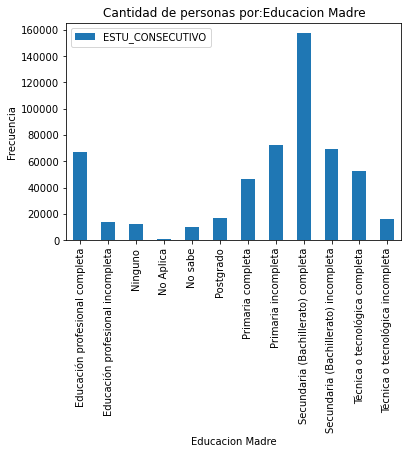

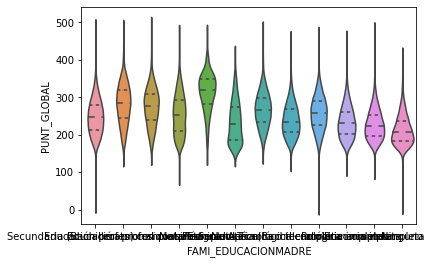

Conclusion: Hay mayor cantidad de personas con una educacion basica (primaria o bachillerato) en el caso de las madres, esto parece influcenciar el puntaje global de las personas que presentan el examen.


In [18]:
#Educacion Madre
grafico_barras(base_final,'FAMI_EDUCACIONMADRE','ESTU_CONSECUTIVO','Educacion Madre', 'Educacion Madre','No')
grafico_violin(base_final,'FAMI_EDUCACIONMADRE','PUNT_GLOBAL')
print('Conclusion: Hay mayor cantidad de personas con una educacion basica (primaria o bachillerato) en el caso de las madres, esto parece \
influcenciar el puntaje global de las personas que presentan el examen.')

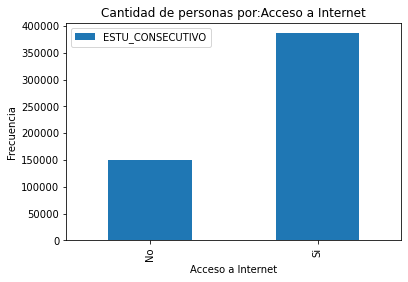

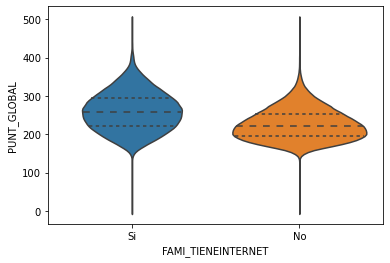

Conclusion: Hay mayor cantidad de personas con acceso a internet en el caso de las madres, esto parece influcenciar el puntaje global de las personas que presentan el examen acorde a las graficas de violin.


In [19]:
#Acceso a internet
grafico_barras(base_final,'FAMI_TIENEINTERNET','ESTU_CONSECUTIVO','Acceso a Internet', 'Acceso a Internet','No')
grafico_violin(base_final,'FAMI_TIENEINTERNET','PUNT_GLOBAL')
print('Conclusion: Hay mayor cantidad de personas con acceso a internet en el caso de las madres, esto parece \
influcenciar el puntaje global de las personas que presentan el examen acorde a las graficas de violin.')

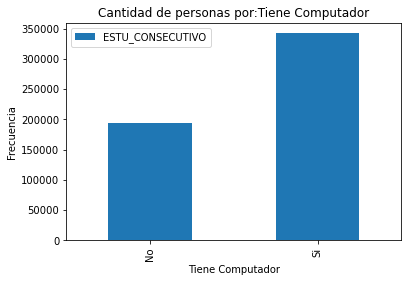

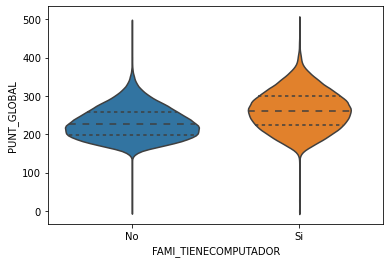

Conclusion: Al revisar la grafica de violin, hay un comportamiento similar entre tener internet y computador, por lo cual se descarta esta variable y se trabajara unicamente con tener internet.


In [20]:
#Tiene computador
grafico_barras(base_final,'FAMI_TIENECOMPUTADOR','ESTU_CONSECUTIVO','Tiene Computador', 'Tiene Computador','No')
grafico_violin(base_final,'FAMI_TIENECOMPUTADOR','PUNT_GLOBAL')
print('Conclusion: Al revisar la grafica de violin, hay un comportamiento similar entre tener internet y computador, por lo cual \
se descarta esta variable y se trabajara unicamente con tener internet.')

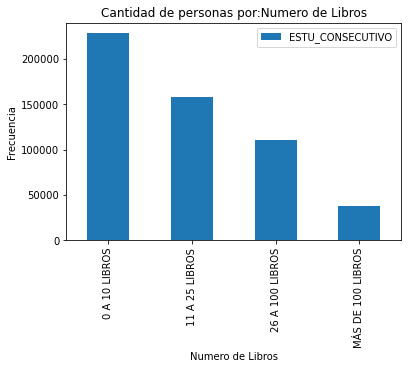

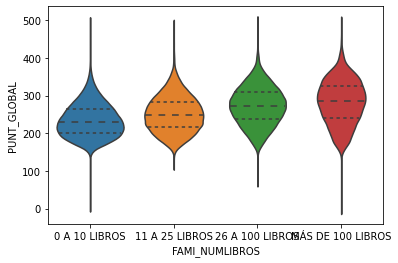

Conclusion: Hay una mayor cantidad de personas con una menor cantidad de libros y parece existir una relacion entre la cantidad de libros y el puntaje global. Teniendo en cuenta esto, se va a incluir la variable dentro de posteriores analisis.


In [21]:
#Numero de Libros
grafico_barras(base_final,'FAMI_NUMLIBROS','ESTU_CONSECUTIVO','Numero de Libros', 'Numero de Libros','No')
grafico_violin(base_final,'FAMI_NUMLIBROS','PUNT_GLOBAL')
print('Conclusion: Hay una mayor cantidad de personas con una menor cantidad de libros y parece existir una relacion entre la cantidad \
de libros y el puntaje global. Teniendo en cuenta esto, se va a incluir la variable dentro de posteriores analisis.')

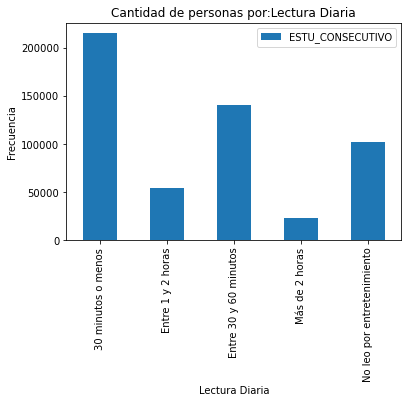

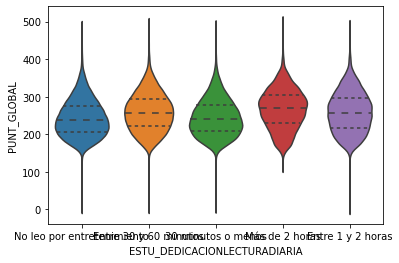

Conclusion: Parece existir una relacion entre la cantidad de tiempo dedicado a la lectura y el puntaje global. Teniendo en cuenta esto se va a incluir dentro de futuros analisis.


In [22]:
#Dedicacion Lectura
grafico_barras(base_final,'ESTU_DEDICACIONLECTURADIARIA','ESTU_CONSECUTIVO','Lectura Diaria', 'Lectura Diaria','No')
grafico_violin(base_final,'ESTU_DEDICACIONLECTURADIARIA','PUNT_GLOBAL')
print('Conclusion: Parece existir una relacion entre la cantidad de tiempo dedicado a la lectura y el puntaje global. \
Teniendo en cuenta esto se va a incluir dentro de futuros analisis.')

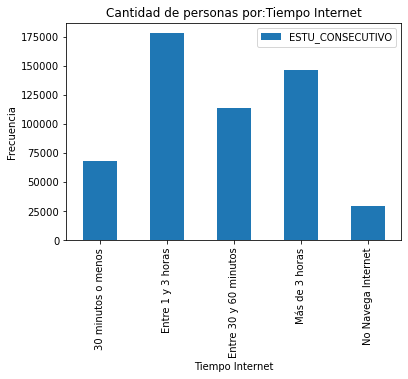

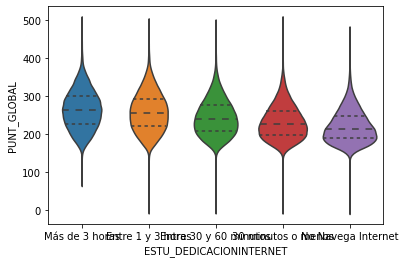

Conclusion: Si bien la mayoria de personas navega en internet, no parece un factor determinante en el resultado de las pruebas.


In [23]:
#Dedicacion Internet
grafico_barras(base_final,'ESTU_DEDICACIONINTERNET','ESTU_CONSECUTIVO','Tiempo Internet', 'Tiempo Internet','No')
grafico_violin(base_final,'ESTU_DEDICACIONINTERNET','PUNT_GLOBAL')
print('Conclusion: Si bien la mayoria de personas navega en internet, no parece un factor determinante \
en el resultado de las pruebas.')

##### Teniendo en cuenta los analisis realizados las variables de interes que seran consideradas  de interes para evaluar si una persona se encuentra en riesgo o no seran:
* ESTU_TIENEETNIA
* COLE_BILINGUE
* FAMI_ESTRATOVIVIENDA
* FAMI_EDUCACIONPADRE
* FAMI_EDUCACIONMADRE
* FAMI_TIENEINTERNET
* FAMI_NUMLIBROS
* ESTU_DEDICACIONLECTURADIARIA

De las variables seleccionadas es importante destacar que sus funciones de densidad acorde a los graficos de violines parecen tener una relacion con el puntaje global. Es pertinente mencionar que estas variables tienen sentido desde un punto de vista socio-economico y demografico, en la medida que crecer en ciertas condiciones influencian nuestra capacidad de respuesta ante estos examenes. Ejemplos de esto son: Pertecener a una etnia, el tipo de educacion recibida (bilingue o no), el estrato de la vivienda, la educacion que ha recibido el padre y madre, acceso a recursos como internet, libros y su dedicacion para aprender algo nuevo. 

Asimismo, es importante resaltar la influencia que tiene estudiar en un colegio bilingue, al tener una mayor probabilidad de tener mejores resultados en todos los componentes de las pruebas frente a una persona que no recibe este tipo de educacion.

In [24]:
#Teniendo en cuenta lo mencionado anteriormente se procede a filtrar nuevamente la base con las variables de interes producto
#del analisis realizado y que se tendran en cuenta para la mision 3,
columnas_interes=['ESTU_TIENEETNIA','COLE_BILINGUE','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE',
                    'FAMI_TIENEINTERNET','FAMI_NUMLIBROS','ESTU_DEDICACIONLECTURADIARIA',
                    'PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS',
                    'PUNT_INGLES','PUNT_GLOBAL']

base_analisis= base_final[columnas_interes]
base_analisis.head()

ESTU_TIENEETNIA COLE_BILINGUE FAMI_ESTRATOVIVIENDA  \
0              No             N            Estrato 5   
1              No             N            Estrato 3   
2              No             N            Estrato 3   
3              No             N            Estrato 4   
4              No             N            Estrato 5   

                FAMI_EDUCACIONPADRE                 FAMI_EDUCACIONMADRE  \
0                           No sabe  Secundaria (Bachillerato) completa   
1  Educación profesional incompleta  Secundaria (Bachillerato) completa   
2    Educación profesional completa      Educación profesional completa   
3    Educación profesional completa      Educación profesional completa   
4                 Primaria completa  Secundaria (Bachillerato) completa   

  FAMI_TIENEINTERNET   FAMI_NUMLIBROS ESTU_DEDICACIONLECTURADIARIA  \
0                 Si    0 A 10 LIBROS   No leo por entretenimiento   
1                 Si   11 A 25 LIBROS   No leo por entretenimiento   
2                 Si    0 A 10 LIBROS        Entre 30 y 60 minutos   
3                 Si  26 A 100 LIBROS   No leo por entretenimiento   
4                 Si   11 A 25 LIBROS        Entre 30 y 60 minutos   

   PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  PUNT_C_NATURALES  \
0                    63                62                61   
1                    65                70                63   
2                   100                66                62   
3                    62                55                54   
4                    57                67                53   

   PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  PUNT_GLOBAL  
0                        56         61.0          303  
1                        61         69.0          325  
2                        73         69.0          374  
3                        53         60.0          282  
4                        53         60.0          288

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

##### Se implementara un modelo de regresion logistica en cuanto la variable dependiente va a estar en funcion de la probabilidad de que un estudiante se encuentre en riesgo o no. Adicionalmente, las variables independientes que se van a utilizar son variables categoricas producto del analisis realizado anteriormente. Con base en esto, se procede a hacer una politica para determinar cuando un estudiante se encuentra en riesgo. 


In [25]:
#Filtramos la base para tener unicamente los puntajes por componentes
base_puntajes=base_analisis[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES',
                             'PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
#Miramos unas estadisticas basicas de mediana y percentiles para tomar una decision
base_puntajes.describe()


PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  PUNT_C_NATURALES  \
count         535835.000000     535835.000000     535835.000000   
mean              52.632180         51.534709         48.706969   
std               10.413577         11.949354         10.784549   
min                0.000000          0.000000          0.000000   
25%               45.000000         43.000000         41.000000   
50%               53.000000         51.000000         48.000000   
75%               60.000000         60.000000         56.000000   
max              100.000000        100.000000        100.000000   

       PUNT_SOCIALES_CIUDADANAS    PUNT_INGLES  
count             535835.000000  535835.000000  
mean                  48.722478      48.024045  
std                   12.223736      12.629041  
min                    0.000000       0.000000  
25%                   39.000000      39.000000  
50%                   48.000000      46.000000  
75%                   58.000000      53.000000  
max                  100.000000     100.000000

###### Politica: Se define "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil  30 en más de la mitad de las áreas de la prueba. Los percentiles a continuacion:

In [26]:
criterios_puntajes=base_puntajes.quantile(.30).tolist()
criterios_nombres = base_puntajes.columns.unique().tolist()
criterios = dict(zip(criterios_nombres,criterios_puntajes))
df_criterios = pd.DataFrame(criterios.items(), columns=['Tipo de Prueba', 'Criterio'])
df_criterios=df_criterios.set_index('Tipo de Prueba')
df_criterios

Criterio
Tipo de Prueba                    
PUNT_LECTURA_CRITICA          47.0
PUNT_MATEMATICAS              45.0
PUNT_C_NATURALES              42.0
PUNT_SOCIALES_CIUDADANAS      41.0
PUNT_INGLES                   41.0

In [27]:
diccionario={}
for i in range(len(df_criterios)):
    nombre_vector = 'vector_' + str(i)
    nombre_vector=base_puntajes[df_criterios.index[i]].apply(lambda x:1 if x <= df_criterios.iloc[i,0] else 0)
    diccionario[i]=nombre_vector
    
politica = pd.DataFrame(diccionario)
politica["En_Riesgo"] = politica.sum(axis=1)
politica["En_Riesgo"]=politica["En_Riesgo"].apply(lambda x:1 if x >= 3 else 0)
base_analisis=base_analisis.drop(columns=base_puntajes.columns.tolist())
base_analisis=base_analisis.drop(columns=['PUNT_GLOBAL'])


###### Se procede a hacer el modelo logistico planteado anteriormente. Se va a evaluar el accuracy: el cual se entiende como la proporcion de datos que se pronosticaron de manera correcta sobre el total de la datos evaluados. 

In [29]:
#Cambio las variables categoricas por variables dummies para proceder con la regresion logistica
Modelo=pd.get_dummies(base_analisis, columns=['ESTU_TIENEETNIA','COLE_BILINGUE',\
                                       'FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TIENEINTERNET',\
                                       'FAMI_NUMLIBROS','ESTU_DEDICACIONLECTURADIARIA'], drop_first=True)
#Incluimos la variable independiente dentro de la matriz, ya se encuentra en ceros y unos.
Modelo['En_Riesgo']=politica["En_Riesgo"]

Modelo.sample(5)


ESTU_TIENEETNIA_Si  COLE_BILINGUE_S  FAMI_ESTRATOVIVIENDA_Estrato 2  \
337                      0                0                               0   
231775                   0                0                               1   
496737                   0                0                               1   
381885                   0                0                               0   
435026                   0                0                               1   

        FAMI_ESTRATOVIVIENDA_Estrato 3  FAMI_ESTRATOVIVIENDA_Estrato 4  \
337                                  1                               0   
231775                               0                               0   
496737                               0                               0   
381885                               0                               1   
435026                               0                               0   

        FAMI_ESTRATOVIVIENDA_Estrato 5  FAMI_ESTRATOVIVIENDA_Estrato 6  \
337                                  0                               0   
231775                               0                               0   
496737                               0                               0   
381885                               0                               0   
435026                               0                               0   

        FAMI_ESTRATOVIVIENDA_Sin Estrato  \
337                                    0   
231775                                 0   
496737                                 0   
381885                                 0   
435026                                 0   

        FAMI_EDUCACIONPADRE_Educación profesional incompleta  \
337                                                     0      
231775                                                  0      
496737                                                  0      
381885                                                  0      
435026                                                  0      

        FAMI_EDUCACIONPADRE_Ninguno  ...  \
337                               0  ...   
231775                            0  ...   
496737                            0  ...   
381885                            0  ...   
435026                            0  ...   

        FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta  \
337                                                     0      
231775                                                  0      
496737                                                  0      
381885                                                  0      
435026                                                  0      

        FAMI_TIENEINTERNET_Si  FAMI_NUMLIBROS_11 A 25 LIBROS  \
337                         1                              0   
231775                      0                              0   
496737                      1                              0   
381885                      1                              0   
435026                      1                              0   

        FAMI_NUMLIBROS_26 A 100 LIBROS  FAMI_NUMLIBROS_MÁS DE 100 LIBROS  \
337                                  1                                 0   
231775                               0                                 0   
496737                               0                                 1   
381885                               0                                 0   
435026                               0                                 0   

        ESTU_DEDICACIONLECTURADIARIA_Entre 1 y 2 horas  \
337                                                  1   
231775                                               0   
496737                                               1   
381885                                               0   
435026                                               0   

        ESTU_DEDICACIONLECTURADIARIA_Entre 30 y 60 minutos  \
337                                                     0    
231775                      

In [30]:
#Test train split
X_train, X_test, y_train, y_test = train_test_split(Modelo.drop('En_Riesgo',axis=1),Modelo['En_Riesgo'], test_size=0.2, random_state=0)

In [31]:
#Train the model using the training data
LogReg =LogisticRegression()
LogReg.fit(X_train, y_train)


LogisticRegression()

In [32]:
print('El intercepto de la regresion es: ' + str(LogReg.intercept_))
print('Los coeficientes de la regresion son: ' + str(LogReg.coef_))

El intercepto de la regresion es: [-0.93336461]
Los coeficientes de la regresion son: [[ 0.93840439 -0.47985307 -0.048054   -0.09918059  0.0938139   0.18590605
   0.37272322  0.96038992  0.0575925   0.99477289  0.18557086  0.19049608
  -0.72645602  0.48681191  0.49335341  0.35845881  0.47456492 -0.01700464
   0.26482146  0.04618136  1.13262129  1.15616243  0.63559937 -0.6442041
   0.70297425  0.80495733  0.48385564  0.60446992 -0.01298513  0.23146341
  -0.62008693 -0.33752326 -0.7496969  -0.53340696 -0.23017586 -0.36272309
  -0.47039123  0.14180072]]


In [33]:
predictions = LogReg.predict(X_test)
print(predictions)
print(LogReg.predict_proba(X_test))

[0 0 0 ... 0 0 0]
[[0.87033906 0.12966094]
 [0.68145098 0.31854902]
 [0.51210514 0.48789486]
 ...
 [0.79690915 0.20309085]
 [0.7524954  0.2475046 ]
 [0.80103598 0.19896402]]


In [34]:
accuracy=LogReg.score(X_test, y_test)

print('Acorde al accuracy: el modelo clasifico bien el ' + str(accuracy)+' de los ensayos (TP+TN)/n')

Acorde al accuracy: el modelo clasifico bien el 0.7258297796896432 de los ensayos (TP+TN)/n


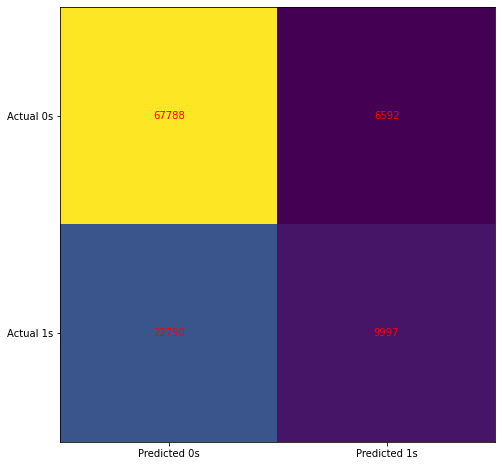

In [35]:
#Se presenta la matriz de confusion a manera informativa sobre los dats de entrenamiento. 

cm = confusion_matrix(y_test, LogReg.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [36]:
titulo = '# Pruebas Saber Pro 11'

In [37]:
columnasdisponibles=list(base_analisis.columns.unique())
select_x= pn.widgets.Select(name='Componente Prueba', options=['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES',
                             'PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES'])
select_y= pn.widgets.Select(name='Categoria de Interes', options=columnasdisponibles)

In [38]:
@pn.depends(select_x,select_y)
def funcion_interactiva(select_x,select_y):
    # Cargamos los datos.
    df = base_final
    #filtramos la base
    df_bar= df[[select_y,'ESTU_CONSECUTIVO']]
    df_bar=df_bar.groupby(by=select_y).count().reset_index()
    
    fig= make_subplots(rows=2,cols=1,subplot_titles=('Categoria de Interes: '+ str(select_y),'Categorica de interes vs Puntaje'))
                                                     
    
    
    grafico1 = go.Bar(
                        x=df_bar['ESTU_CONSECUTIVO'],
                        y=df_bar[select_y],
                        text=df_bar['ESTU_CONSECUTIVO'],
                        textposition='outside',                                # Posición de la etiqueta de datos. En este caso a la derecha.
                        texttemplate='%{text:.2s}',                            # Formato de texto.
                        marker_color='rgb(26, 118, 255)',                      # Color de las barras.
                        orientation='h'                                        # Orientación de las barras. En este caso horizontal.
                      )
    
    grafico2 = go.Violin(
                    x=df[select_y],
                    y=df[select_x],
                    name=select_y,
                  )
    
    fig.append_trace(grafico1, 1, 1)
    fig.append_trace(grafico2, 2, 1)
    fig['layout'].update(height=800, width=800,plot_bgcolor='white',showlegend=False)
    
    return fig


  

In [40]:
tablero_control = pn.Column((titulo),select_x,select_y, funcion_interactiva)

##### Con el siguiente panel interactivo la persona sera capaz de revisar relaciones existentes entre las variables categoricas propuestas con los puntajes por asignatura y global que se evalua en la prueba del examen. De igual forma, se presenta un grafico de barras que nos muestra como la poblacion de dicha categoria se encuentra distribuida entre los componentes de la categoria de interes. 

* Para implementar la herramienta:
1. Seleccione el componente del examen que quiere evaluar. Por ejemplo: Punt_Matematicas (Puntajes obtenidos en Matematicas)
2. Seleccione la categoria de interes. Por ejemplo: FAMI_ESTRATO (Estrato Economico 1,2,3,4...)

#### Pregunta (Ejemplo):
* Estudiar en una colegio bilingue da una mayor probabilidad de obtener mejores resultados en los diferentes componentes del examen Saber Pro 11?

In [41]:
tablero_control.servable()

Column
    [0] Markdown(str)
    [1] Select(name='Componente Prueba', options=['PUNT_LECTURA_CRITICA', ...], value='PUNT_LECTURA_CRITICA')
    [2] Select(name='Categoria de Interes', options=['ESTU_TIENEETNIA', ...], value='ESTU_TIENEETNIA')
    [3] ParamFunction(function)